In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

#for display csv file all column
from IPython.display import display

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

c:\users\shahj\appdata\local\programs\python\python35\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\shahj\appdata\local\programs\python\python35\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
c:\users\shahj\appdata\local\programs\python\python35\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\shahj\appdata\local\programs\python\python35\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [6]:
train = pd.read_csv("data/train.csv")
pd.options.display.max_columns = None
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [7]:
test = pd.read_csv("data/test.csv")
pd.options.display.max_columns = None
test.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

In [8]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


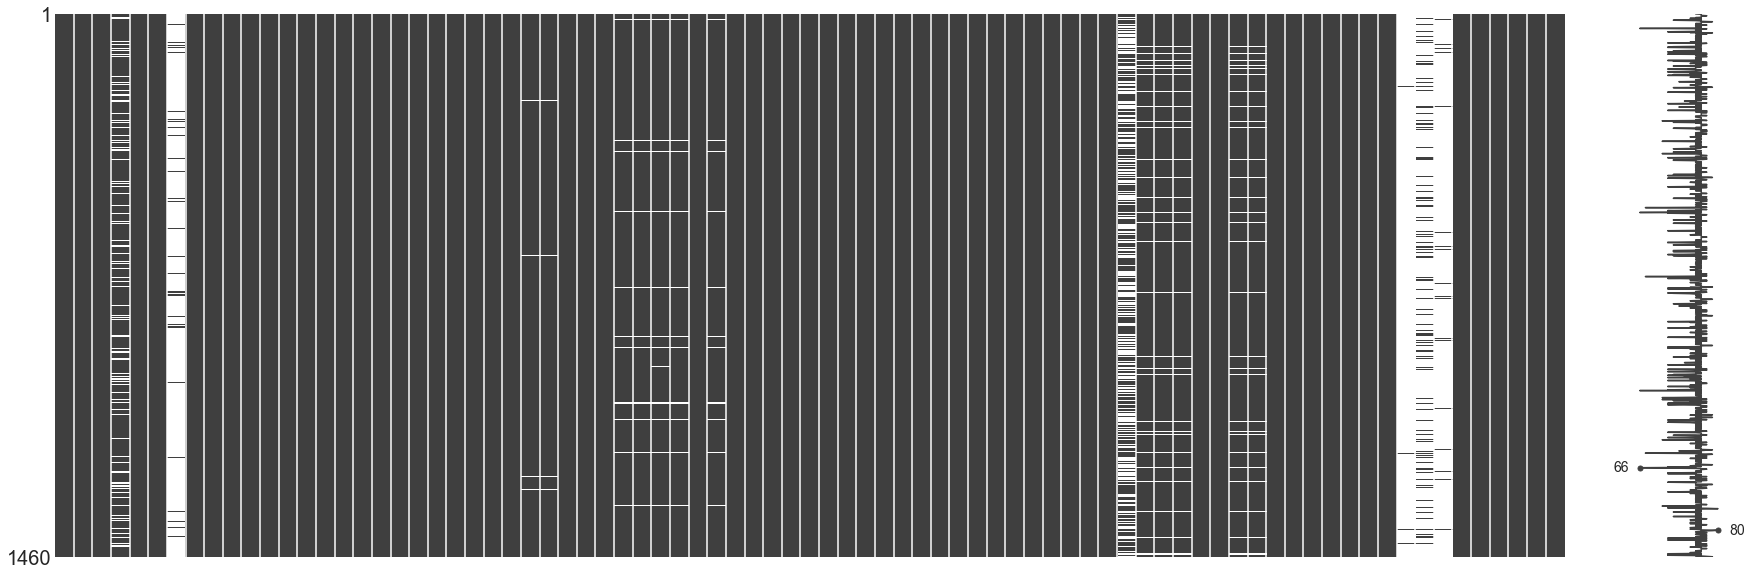

In [10]:
missingno.matrix(train,figsize=(30,10))

In [11]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [19]:
df_bin = pd.DataFrame()
df_con = pd.DataFrame()

In [20]:
train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [21]:
test.MSSubClass.value_counts()

20     543
60     276
50     143
120     95
30      70
70      68
160     65
80      60
90      57
190     31
85      28
180      7
75       7
45       6
40       2
150      1
Name: MSSubClass, dtype: int64

In [25]:
df_bin['MSSubClass'] = train['MSSubClass']
df_con['MSSubClass'] = test['MSSubClass']

In [26]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [27]:
test.MSZoning.value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [28]:
df_bin['MSZoning'] = train['MSZoning']
df_con['MSZoning'] = test['MSZoning']

In [30]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('MSSubClass')
df_bin_enc = pd.get_dummies(df_bin,columns=one_hot_cols)
df_bin_enc.head()

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,0,0,0,1,0
1,20,0,0,0,1,0
2,60,0,0,0,1,0
3,70,0,0,0,1,0
4,60,0,0,0,1,0


In [31]:
one_hot_cols_2 = df_con.columns.tolist()
one_hot_cols_2.remove('MSSubClass')
df_con_enc = pd.get_dummies(df_con,columns=one_hot_cols_2)
df_con_enc.head()

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,20,0,0,1,0,0
1,20,0,0,0,1,0
2,60,0,0,0,1,0
3,60,0,0,0,1,0
4,120,0,0,0,1,0


In [32]:
train.LotFrontage.isnull().sum()

259

In [33]:
data = [train,test]
for dataset in data:
    mean = train['LotFrontage'].mean()
    std = train['LotFrontage'].std()
    is_null = dataset['LotFrontage'].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    age_slice = dataset['LotFrontage'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['LotFrontage'] = age_slice
    dataset['LotFrontage'] = train['LotFrontage'].astype(int)
train['LotFrontage'].isnull().sum()

0

In [34]:
df_bin['LotFrontage'] = train['LotFrontage']
df_con['LotFrontage'] = test['LotFrontage']

In [35]:
df_bin

,MSSubClass,MSZoning,LotFrontage
0,60,RL,65
1,20,RL,80
2,60,RL,68
3,70,RL,60
4,60,RL,84
...,...,...,...
1455,60,RL,62
1456,20,RL,85
1457,70,RL,66
1458,20,RL,68


In [36]:
df_con

,MSSubClass,MSZoning,LotFrontage
0,20,RH,65
1,20,RL,80
2,60,RL,68
3,60,RL,60
4,120,RL,84
...,...,...,...
1454,160,RM,62
1455,160,RM,62
1456,20,RL,85
1457,85,RL,66


In [37]:
df_bin = df_bin_enc
df_con = df_con_enc

In [38]:
df_bin

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,0,0,0,1,0
1,20,0,0,0,1,0
2,60,0,0,0,1,0
3,70,0,0,0,1,0
4,60,0,0,0,1,0
...,...,...,...,...,...,...
1455,60,0,0,0,1,0
1456,20,0,0,0,1,0
1457,70,0,0,0,1,0
1458,20,0,0,0,1,0


In [39]:
df_bin['LotFrontage'] = train['LotFrontage']

In [40]:
df_con

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,20,0,0,1,0,0
1,20,0,0,0,1,0
2,60,0,0,0,1,0
3,60,0,0,0,1,0
4,120,0,0,0,1,0
...,...,...,...,...,...,...
1454,160,0,0,0,0,1
1455,160,0,0,0,0,1
1456,20,0,0,0,1,0
1457,85,0,0,0,1,0


In [41]:
df_bin['LotArea'] = train['LotArea']

In [42]:
df_con['LotArea'] = test['LotArea']

In [43]:
df_con

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotArea
0,20,0,0,1,0,0,11622
1,20,0,0,0,1,0,14267
2,60,0,0,0,1,0,13830
3,60,0,0,0,1,0,9978
4,120,0,0,0,1,0,5005
...,...,...,...,...,...,...,...
1454,160,0,0,0,0,1,1936
1455,160,0,0,0,0,1,1894
1456,20,0,0,0,1,0,20000
1457,85,0,0,0,1,0,10441


In [44]:
df_bin['BldgType'] = train['BldgType']
df_con['BldgType'] = test['BldgType']

In [45]:
df_bin['OverallQual'] = train['OverallQual']
df_con['OverallQual'] = test['OverallQual']


df_bin['OverallCond'] = train['OverallCond']
df_con['OverallCond'] = test['OverallCond']

In [46]:
df_bin['YearBuilt'] = train['YearBuilt']
df_con['YearBuilt'] = test['YearBuilt']

df_bin['YearRemodAdd'] = train['YearRemodAdd']
df_con['YearRemodAdd'] = test['YearRemodAdd']

In [47]:
train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [48]:
test.BsmtQual.value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [49]:
train.BsmtQual.isnull().sum()

37

In [50]:
test.BsmtQual.isnull().sum()

44

In [51]:
test.BsmtQual.describe()

count     1415
unique       4
top         TA
freq       634
Name: BsmtQual, dtype: object

In [52]:
train.BsmtQual.describe()

count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object

In [53]:
common_value = 'TA'
data = [train,test]
for dataset in data:
    dataset['BsmtQual'] = dataset['BsmtQual'].fillna(common_value)

In [54]:
train.BsmtQual.isnull().sum()

0

In [55]:
df_bin['BsmtQual'] = train['BsmtQual']

In [56]:
df_con['BsmtQual'] = test['BsmtQual']

In [57]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,70,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0

In [58]:
train.BsmtCond.isnull().sum()

37

In [59]:
train.BsmtCond.describe()

count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object

In [60]:
common_value = 'TA'
data = [train,test]
for dataset in data:
    dataset['BsmtCond'] = dataset['BsmtCond'].fillna(common_value)

In [61]:
df_bin['BsmtCond'] = train['BsmtCond']

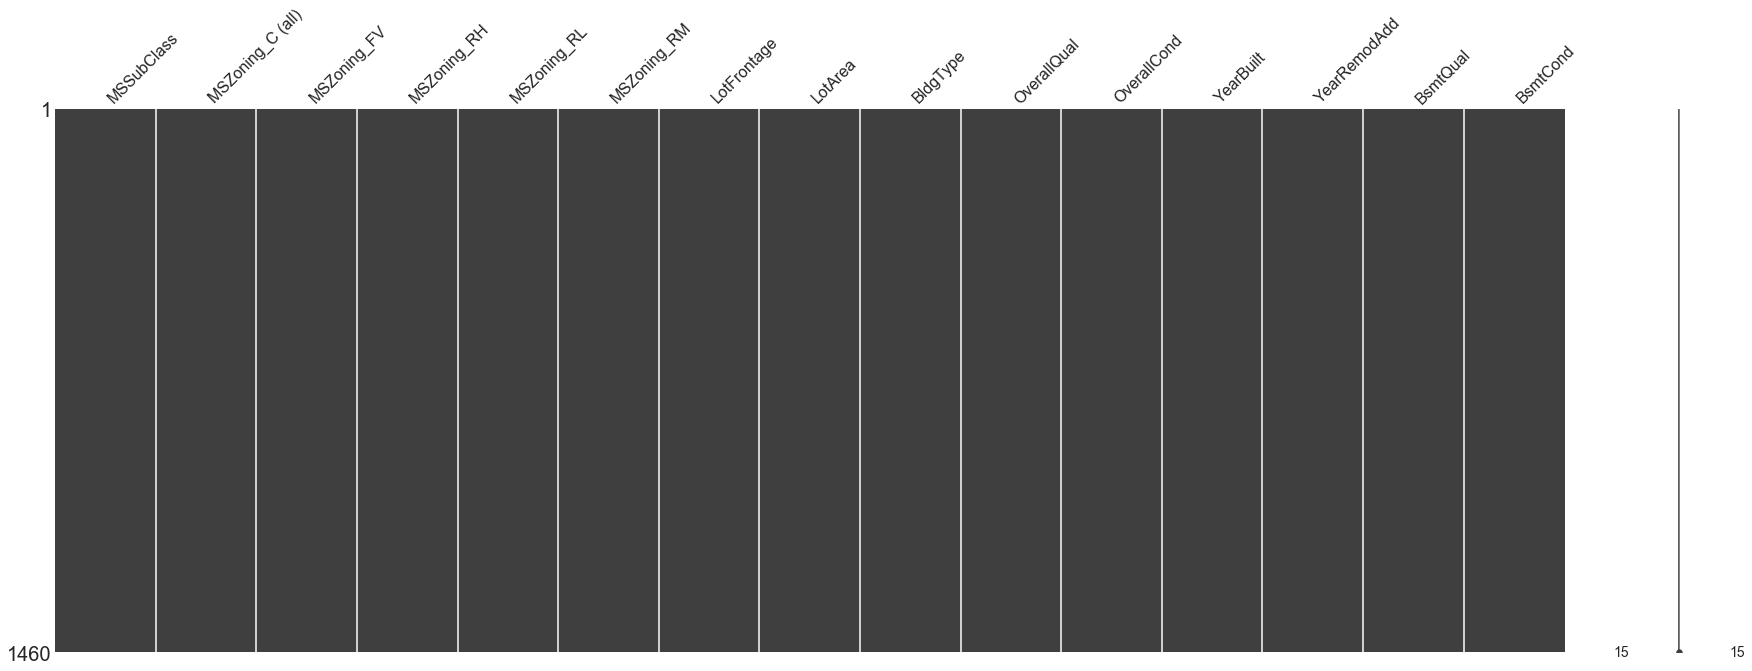

In [62]:
missingno.matrix(df_bin,figsize=(30,10))

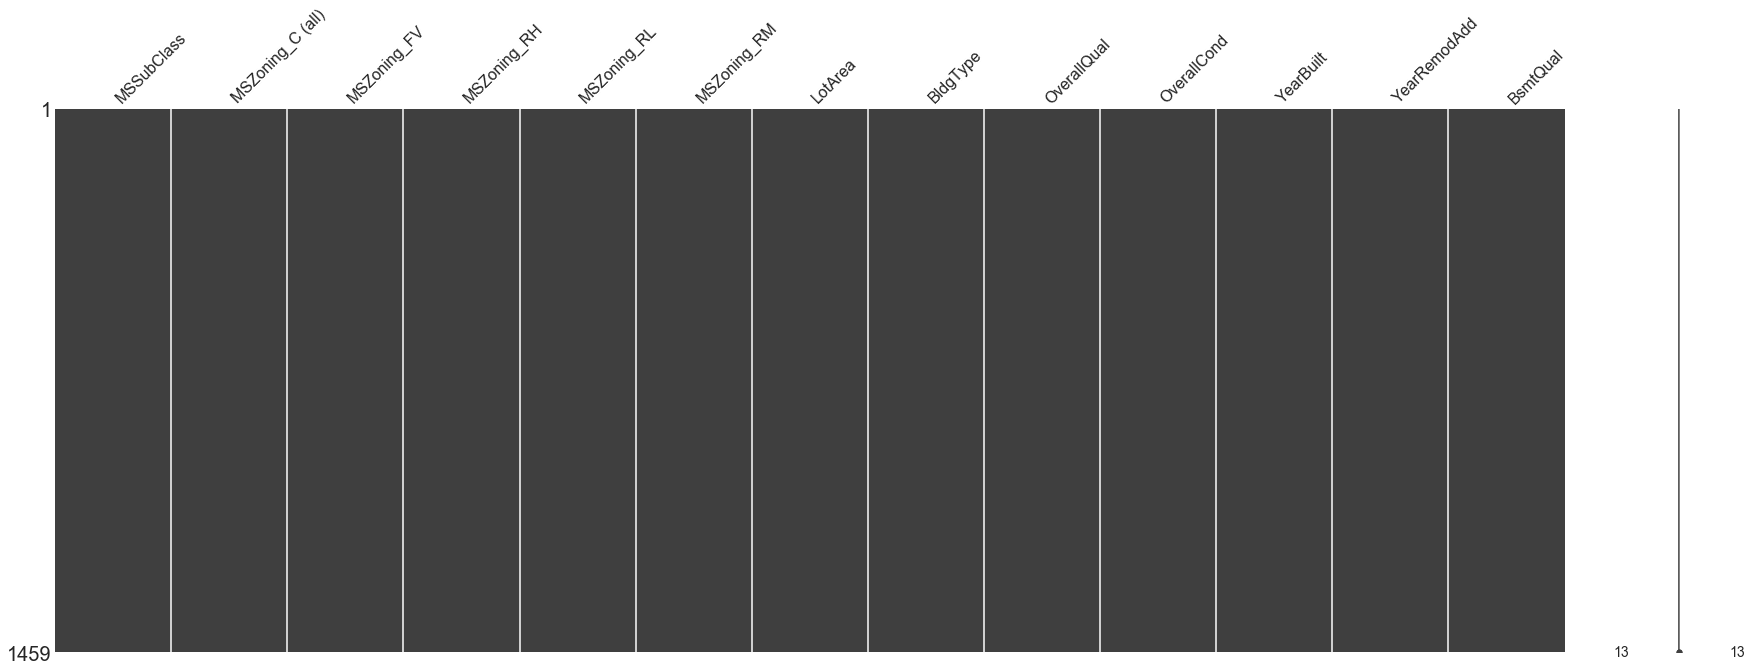

In [63]:
missingno.matrix(df_con,figsize=(30,10))

In [64]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,70,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0

In [65]:
train.Heating.isnull().sum()

0

In [66]:
train.Heating.describe()

count     1460
unique       6
top       GasA
freq      1428
Name: Heating, dtype: object

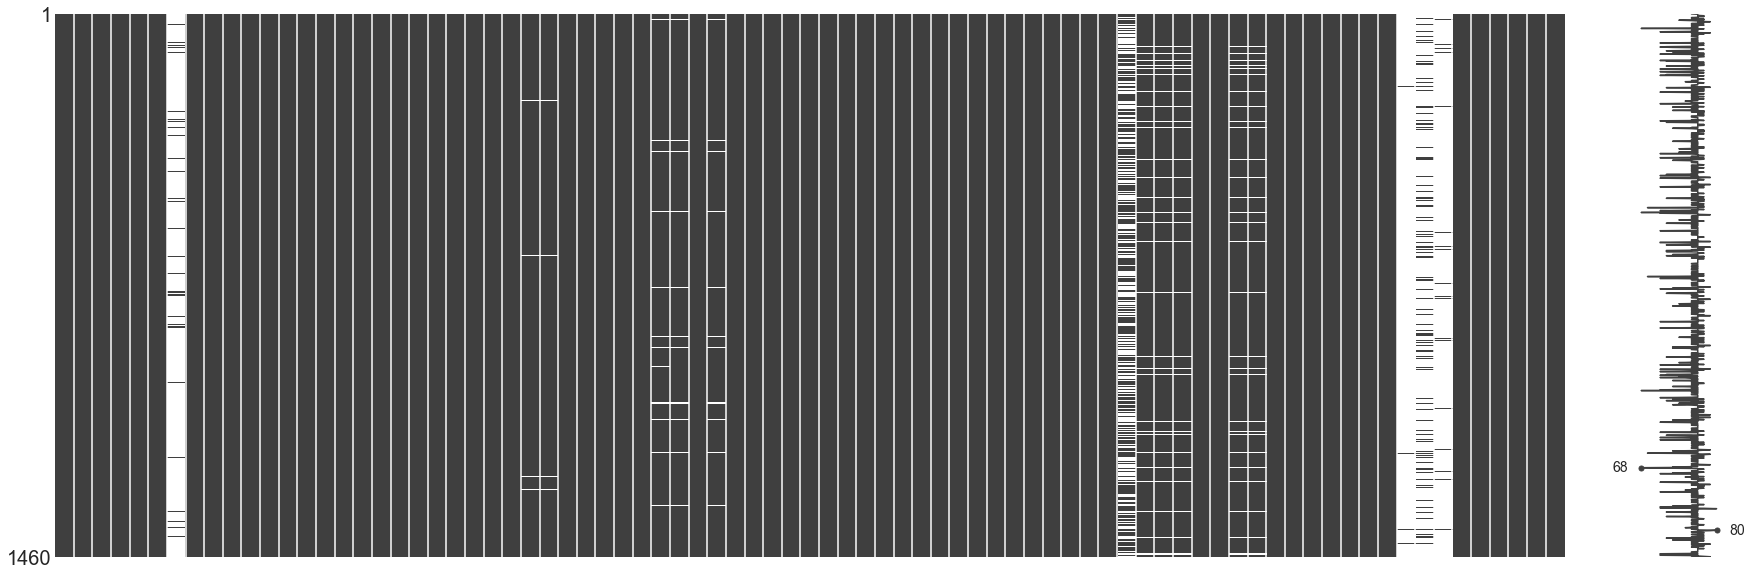

In [67]:
missingno.matrix(train,figsize=(30,10))

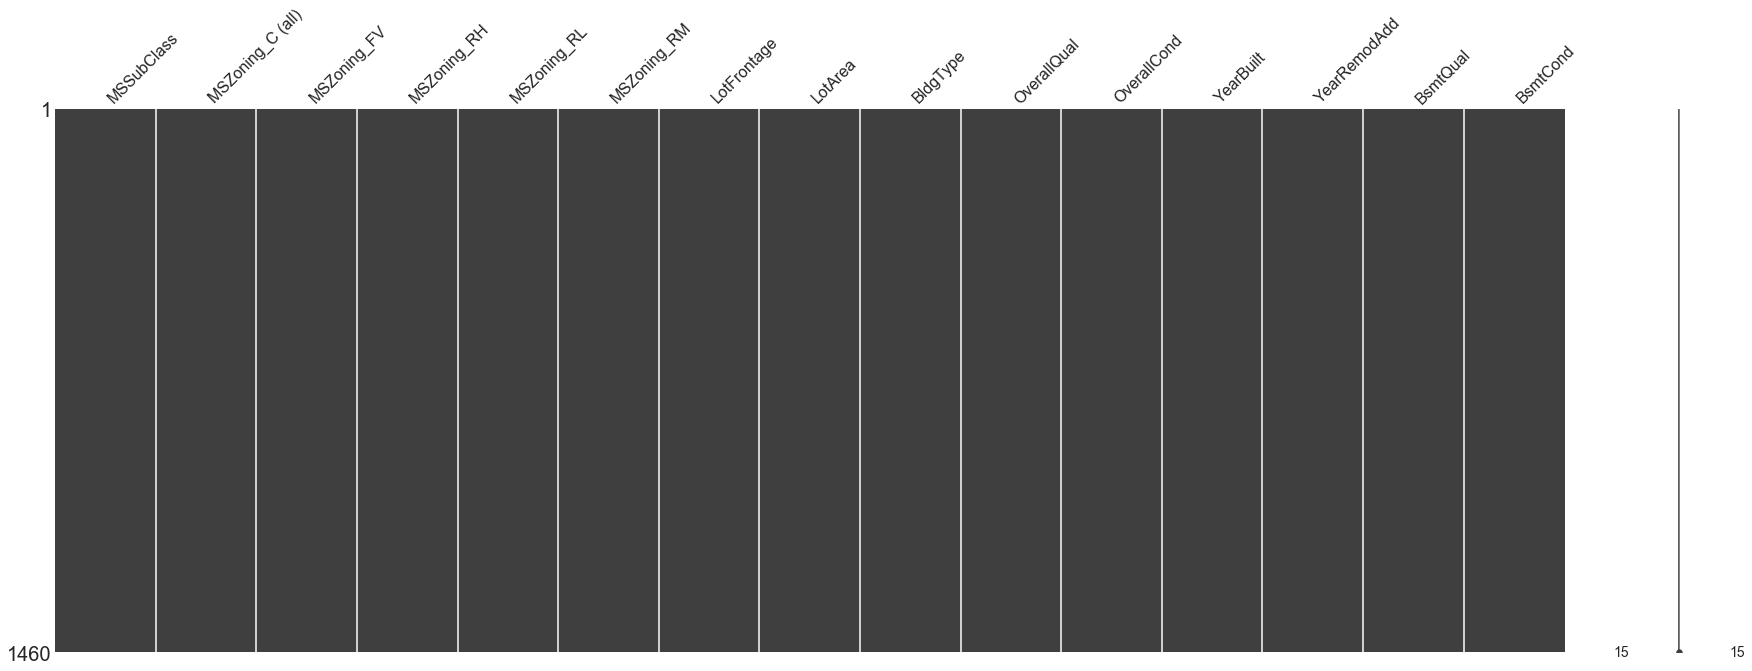

In [68]:
missingno.matrix(df_bin,figsize=(30,10))

In [69]:
df_bin.head(10)

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond
0,60,0,0,0,1,0,65,8450,1Fam,7,5,2003,2003,Gd,TA
1,20,0,0,0,1,0,80,9600,1Fam,6,8,1976,1976,Gd,TA
2,60,0,0,0,1,0,68,11250,1Fam,7,5,2001,2002,Gd,TA
3,70,0,0,0,1,0,60,9550,1Fam,7,5,1915,1970,TA,Gd
4,60,0,0,0,1,0,84,14260,1Fam,8,5,2000,2000,Gd,TA
5,50,0,0,0,1,0,85,14115,1Fam,5,5,1993,1995,Gd,TA
6,20,0,0,0,1,0,75,10084,1Fam,8,5,2004,2005,Ex,TA
7,60,0,0,0,1,0,70,10382,1Fam,7,6,1973,1973,Gd,TA
8,50,0,0,0,0,1,51,6120,1Fam,7,5,1931,1950,TA,TA
9,190,0,0,0,1,0,50,7420,2fmCon,5,6,1939,1950,TA,TA


In [70]:
df_bin["TotalBsmtSF"] = train["TotalBsmtSF"]

In [71]:
df_con["TotalBsmtSF"] = test["TotalBsmtSF"]

In [72]:
df_bin["Heating"] = train["Heating"]

In [73]:
df_con["Heating"] = test["Heating"]

In [74]:
train['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [75]:
common_value = 'SBrkr'
data = [train,test]
for dataset in data:
    dataset['Electrical'] = dataset['Electrical'].fillna(common_value)

In [76]:
train['Electrical'].isnull().sum()

0

In [77]:
df_bin['Electrical'] = train['Electrical']

In [78]:
df_con['Electrical'] = test['Electrical']

In [79]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,70,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0

In [80]:
train['Functional'].isnull().sum()

0

In [81]:
train['Functional'].describe()

count     1460
unique       7
top        Typ
freq      1360
Name: Functional, dtype: object

In [82]:
train['Functional'].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [83]:
df_bin["Functional"] = train["Functional"]

In [84]:
df_con["Functional"] = test["Functional"]

In [85]:
train['Fireplaces'].describe()

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64

In [86]:
train['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [87]:
train['Fireplaces'].isnull().sum()

0

In [88]:
df_bin["Fireplaces"] = train["Fireplaces"]

In [89]:
df_con["Fireplaces"] = test["Fireplaces"]

In [90]:
train['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [91]:
df_bin["PoolArea"] = train["PoolArea"]

In [92]:
df_con["PoolArea"] = test["PoolArea"]

In [93]:
train['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [94]:
train["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [95]:
train["SaleType"].isnull().sum()

0

In [96]:
df_bin["SaleType"] = train["SaleType"]

In [97]:
df_con["SaleType"] = test["SaleType"]

In [98]:
train["SaleCondition"].isnull().sum()

0

In [99]:
df_bin["SaleCondition"] = train["SaleCondition"]

In [100]:
df_con["SaleCondition"] = test["SaleCondition"]

In [101]:
train["SalePrice"].isnull().sum()

0

In [102]:
df_bin["SalePrice"] = train["SalePrice"]

In [103]:
df_bin

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,TotalBsmtSF,Heating,Electrical,Functional,Fireplaces,PoolArea,SaleType,SaleCondition,SalePrice
0,60,0,0,0,1,0,65,8450,1Fam,7,5,2003,2003,Gd,TA,856,GasA,SBrkr,Typ,0,0,WD,Normal,208500
1,20,0,0,0,1,0,80,9600,1Fam,6,8,1976,1976,Gd,TA,1262,GasA,SBrkr,Typ,1,0,WD,Normal,181500
2,60,0,0,0,1,0,68,11250,1Fam,7,5,2001,2002,Gd,TA,920,GasA,SBrkr,Typ,1,0,WD,Normal,223500
3,70,0,0,0,1,0,60,9550,1Fam,7,5,1915,1970,TA,Gd,756,GasA,SBrkr,Typ,1,0,WD,Abnorml,140000
4,60,0,0,0,1,0,84,14260,1Fam,8,5,2000,2000,Gd,TA,1145,GasA,SBrkr,Typ,1,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,0,0,1,0,62,7917,1Fam,6,5,1999,2000,Gd,TA,953,GasA,SBrkr,Typ,1,0,WD,Normal,175000
1456,20,0,0,0,1,0,85,13175,1Fam,6,6,1978,1988,Gd,TA,1542,GasA,SBrkr,Min1,2,0,WD,Normal,210000
1457,70,0,0,0,1,0,66,9042,1Fam,7,9,1941,2006,TA,Gd,1152,GasA,SBrkr,Typ,2,0,WD,Normal,266500
1458,20,0,0,0,1,0,68,9717,1Fam,5,6,1950,1996,TA,TA,1078,GasA,FuseA,Typ,0,0,WD,Normal,142125


In [104]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
MSSubClass          1460 non-null int64
MSZoning_C (all)    1460 non-null uint8
MSZoning_FV         1460 non-null uint8
MSZoning_RH         1460 non-null uint8
MSZoning_RL         1460 non-null uint8
MSZoning_RM         1460 non-null uint8
LotFrontage         1460 non-null int32
LotArea             1460 non-null int64
BldgType            1460 non-null object
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
YearBuilt           1460 non-null int64
YearRemodAdd        1460 non-null int64
BsmtQual            1460 non-null object
BsmtCond            1460 non-null object
TotalBsmtSF         1460 non-null int64
Heating             1460 non-null object
Electrical          1460 non-null object
Functional          1460 non-null object
Fireplaces          1460 non-null int64
PoolArea            1460 non-null int64
SaleType            1460 non-null object
SaleCo

In [105]:
df_con.head(10)

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,TotalBsmtSF,Heating,Electrical,Functional,Fireplaces,PoolArea,SaleType,SaleCondition
0,20,0,0,1,0,0,11622,1Fam,5,6,1961,1961,TA,882.0,GasA,SBrkr,Typ,0,0,WD,Normal
1,20,0,0,0,1,0,14267,1Fam,6,6,1958,1958,TA,1329.0,GasA,SBrkr,Typ,0,0,WD,Normal
2,60,0,0,0,1,0,13830,1Fam,5,5,1997,1998,Gd,928.0,GasA,SBrkr,Typ,1,0,WD,Normal
3,60,0,0,0,1,0,9978,1Fam,6,6,1998,1998,TA,926.0,GasA,SBrkr,Typ,1,0,WD,Normal
4,120,0,0,0,1,0,5005,TwnhsE,8,5,1992,1992,Gd,1280.0,GasA,SBrkr,Typ,0,0,WD,Normal
5,60,0,0,0,1,0,10000,1Fam,6,5,1993,1994,Gd,763.0,GasA,SBrkr,Typ,1,0,WD,Normal
6,20,0,0,0,1,0,7980,1Fam,6,7,1992,2007,Gd,1168.0,GasA,SBrkr,Typ,0,0,WD,Normal
7,60,0,0,0,1,0,8402,1Fam,6,5,1998,1998,Gd,789.0,GasA,SBrkr,Typ,1,0,WD,Normal
8,20,0,0,0,1,0,10176,1Fam,7,5,1990,1990,Gd,1300.0,GasA,SBrkr,Typ,1,0,WD,Normal
9,20,0,0,0,1,0,8400,1Fam,4,5,1970,1970,TA,882.0,GasA,SBrkr,Typ,0,0,WD,Normal


In [106]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 21 columns):
MSSubClass          1459 non-null int64
MSZoning_C (all)    1459 non-null uint8
MSZoning_FV         1459 non-null uint8
MSZoning_RH         1459 non-null uint8
MSZoning_RL         1459 non-null uint8
MSZoning_RM         1459 non-null uint8
LotArea             1459 non-null int64
BldgType            1459 non-null object
OverallQual         1459 non-null int64
OverallCond         1459 non-null int64
YearBuilt           1459 non-null int64
YearRemodAdd        1459 non-null int64
BsmtQual            1459 non-null object
TotalBsmtSF         1458 non-null float64
Heating             1459 non-null object
Electrical          1459 non-null object
Functional          1457 non-null object
Fireplaces          1459 non-null int64
PoolArea            1459 non-null int64
SaleType            1458 non-null object
SaleCondition       1459 non-null object
dtypes: float64(1), int64(8), object(7), uin

In [107]:
df_bin["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [108]:
type = {"1Fam":1,"TwnhsE":2,"Duplex":3,"Twnhs":4,"2fmCon":5}
df_bin["BldgType"] = df_bin["BldgType"].replace(type)

In [109]:
type = {"1Fam":1,"TwnhsE":2,"Duplex":3,"Twnhs":4,"2fmCon":5}
df_con["BldgType"] = df_con["BldgType"].replace(type)

In [110]:
df_bin

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,TotalBsmtSF,Heating,Electrical,Functional,Fireplaces,PoolArea,SaleType,SaleCondition,SalePrice
0,60,0,0,0,1,0,65,8450,1,7,5,2003,2003,Gd,TA,856,GasA,SBrkr,Typ,0,0,WD,Normal,208500
1,20,0,0,0,1,0,80,9600,1,6,8,1976,1976,Gd,TA,1262,GasA,SBrkr,Typ,1,0,WD,Normal,181500
2,60,0,0,0,1,0,68,11250,1,7,5,2001,2002,Gd,TA,920,GasA,SBrkr,Typ,1,0,WD,Normal,223500
3,70,0,0,0,1,0,60,9550,1,7,5,1915,1970,TA,Gd,756,GasA,SBrkr,Typ,1,0,WD,Abnorml,140000
4,60,0,0,0,1,0,84,14260,1,8,5,2000,2000,Gd,TA,1145,GasA,SBrkr,Typ,1,0,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,0,0,1,0,62,7917,1,6,5,1999,2000,Gd,TA,953,GasA,SBrkr,Typ,1,0,WD,Normal,175000
1456,20,0,0,0,1,0,85,13175,1,6,6,1978,1988,Gd,TA,1542,GasA,SBrkr,Min1,2,0,WD,Normal,210000
1457,70,0,0,0,1,0,66,9042,1,7,9,1941,2006,TA,Gd,1152,GasA,SBrkr,Typ,2,0,WD,Normal,266500
1458,20,0,0,0,1,0,68,9717,1,5,6,1950,1996,TA,TA,1078,GasA,FuseA,Typ,0,0,WD,Normal,142125


In [111]:
df_con['BsmtCond'] = test['BsmtCond']

In [112]:
train["BldgType"].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [113]:
df_bin["BsmtQual"].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [114]:
type = {"TA":1,"Gd":2,"Ex":3,"Fa":4}
df_bin["BsmtQual"] = df_bin["BsmtQual"].replace(type)
df_con["BsmtQual"] = df_con["BsmtQual"].replace(type)

In [115]:
df_bin["BsmtCond"].value_counts()

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [116]:
type = {"TA":1,"Gd":2,"Fa":3,"Po":4}
df_bin["BsmtCond"] = df_bin["BsmtCond"].replace(type)

In [117]:
type = {"TA":1,"Gd":2,"Fa":3,"Po":4}
df_con["BsmtCond"] = df_con["BsmtCond"].replace(type)

In [118]:
df_bin = df_bin.drop(['PoolArea'],axis=1)

In [119]:
df_bin["Heating"].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [120]:
type = {"GasA":1,"GasW":2,"Grav":3,"Wall":4,"OthW":5,"Floor":6}
df_bin["Heating"] = df_bin["Heating"].replace(type)
df_con["Heating"] = df_con["Heating"].replace(type)

In [121]:
df_bin["Electrical"].value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [122]:
df_bin['Electrical'] = train['Electrical']
df_con['Electrical'] = test['Electrical']

In [123]:
type = {"SBrkr":1,"FuseA":2,"FuseF":3,"FuseP":4,"Mix":5}
df_bin["Electrical"] = df_bin["Electrical"].replace(type)
df_con["Electrical"] = df_con["Electrical"].replace(type)

In [124]:
df_bin['Functional'] = train['Functional']
df_con['Functional'] = test['Functional']

In [125]:
df_bin["Functional"].value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [126]:
type = {"Typ":1,"Min2":2,"Min1":3,"Mod":4,"Maj1":5,"Maj2":6,"Sev":7}
df_bin["Functional"] = df_bin["Functional"].replace(type)
df_con["Functional"] = df_con["Functional"].replace(type)

In [127]:
df_bin["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [128]:
type = {"WD":1,"New":2,"COD":3,"ConLD":4,"ConLI":5,"ConLw":6,"CWD":7,"Oth":8,"Con":9}
df_bin["SaleType"] = df_bin["SaleType"].replace(type)
df_con["SaleType"] = df_con["SaleType"].replace(type)

In [129]:
df_bin["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [130]:
type = {"Normal":1,"Partial":2,"Abnorml":3,"Family":4,"Alloca":5,"AdjLand":6}
df_bin["SaleCondition"] = df_bin["SaleCondition"].replace(type)
df_con["SaleCondition"] = df_con["SaleCondition"].replace(type)

In [131]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
MSSubClass          1460 non-null int64
MSZoning_C (all)    1460 non-null uint8
MSZoning_FV         1460 non-null uint8
MSZoning_RH         1460 non-null uint8
MSZoning_RL         1460 non-null uint8
MSZoning_RM         1460 non-null uint8
LotFrontage         1460 non-null int32
LotArea             1460 non-null int64
BldgType            1460 non-null int64
OverallQual         1460 non-null int64
OverallCond         1460 non-null int64
YearBuilt           1460 non-null int64
YearRemodAdd        1460 non-null int64
BsmtQual            1460 non-null int64
BsmtCond            1460 non-null int64
TotalBsmtSF         1460 non-null int64
Heating             1460 non-null int64
Electrical          1460 non-null int64
Functional          1460 non-null int64
Fireplaces          1460 non-null int64
SaleType            1460 non-null int64
SaleCondition       1460 non-null int64
SalePrice    

In [132]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 22 columns):
MSSubClass          1459 non-null int64
MSZoning_C (all)    1459 non-null uint8
MSZoning_FV         1459 non-null uint8
MSZoning_RH         1459 non-null uint8
MSZoning_RL         1459 non-null uint8
MSZoning_RM         1459 non-null uint8
LotArea             1459 non-null int64
BldgType            1459 non-null int64
OverallQual         1459 non-null int64
OverallCond         1459 non-null int64
YearBuilt           1459 non-null int64
YearRemodAdd        1459 non-null int64
BsmtQual            1459 non-null int64
TotalBsmtSF         1458 non-null float64
Heating             1459 non-null int64
Electrical          1459 non-null int64
Functional          1457 non-null float64
Fireplaces          1459 non-null int64
PoolArea            1459 non-null int64
SaleType            1458 non-null float64
SaleCondition       1459 non-null int64
BsmtCond            1459 non-null int64
dtypes:

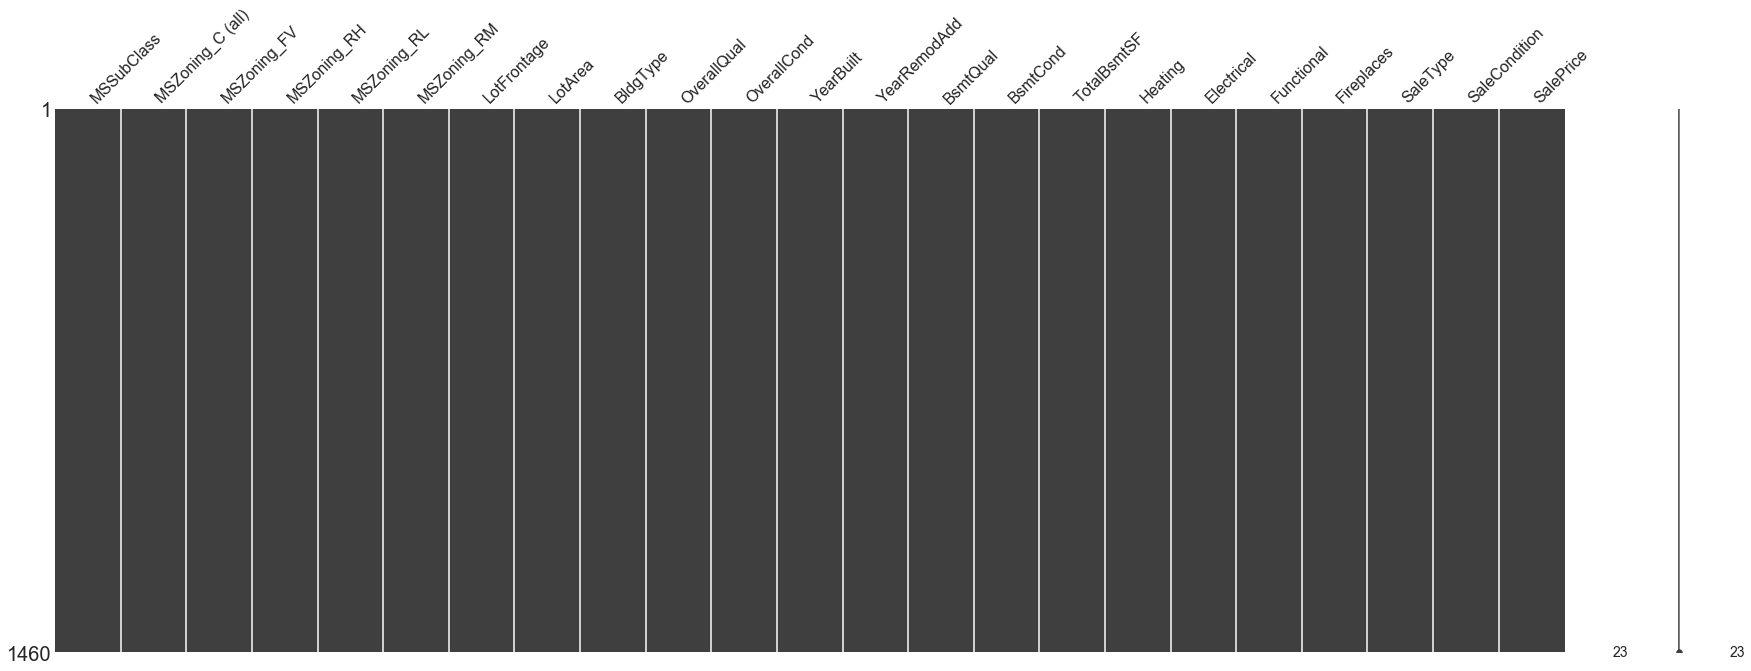

In [133]:
missingno.matrix(df_bin,figsize=(30,10))

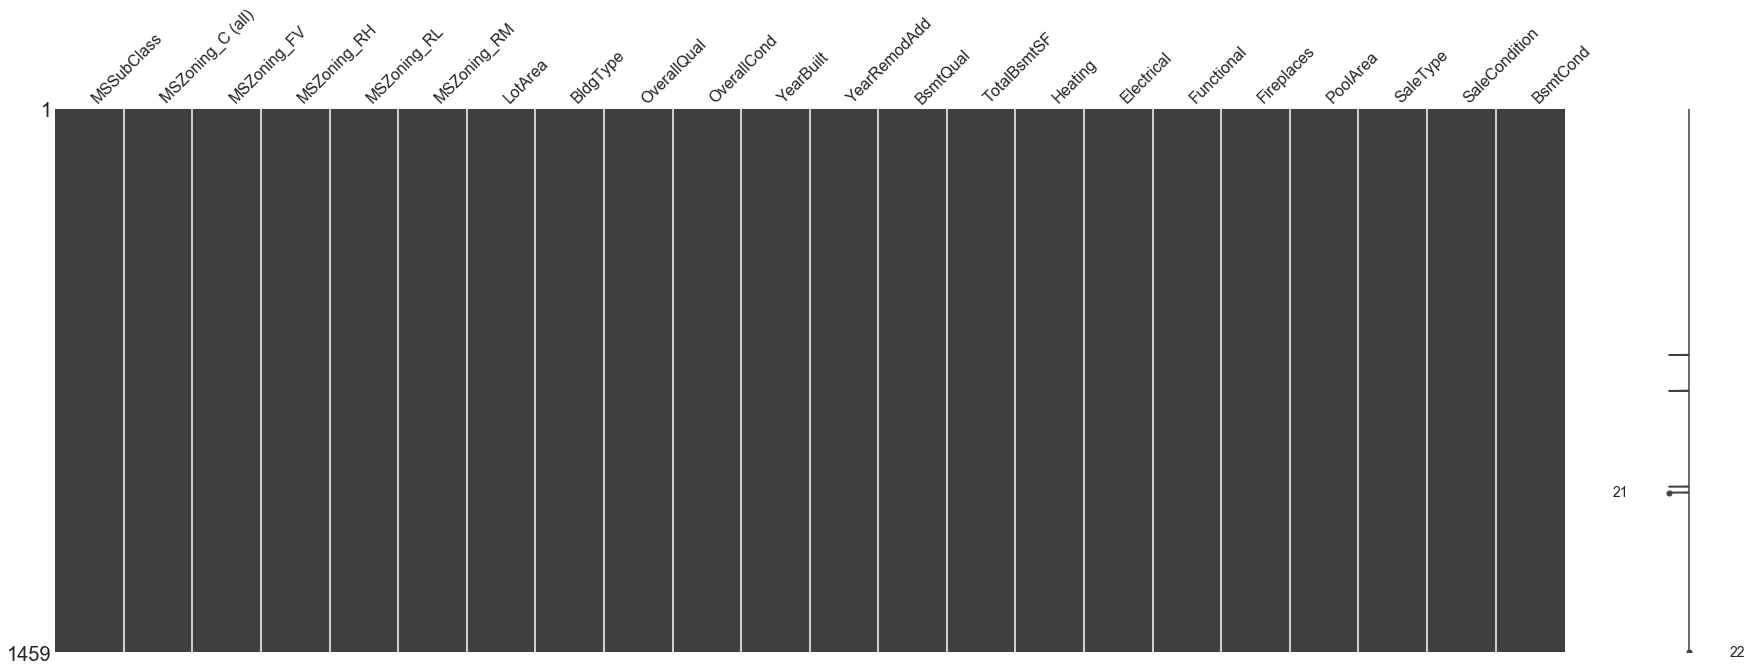

In [134]:
missingno.matrix(df_con,figsize=(30,10))

In [135]:
df_con['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [136]:
df_bin.head(5)

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,BsmtCond,TotalBsmtSF,Heating,Electrical,Functional,Fireplaces,SaleType,SaleCondition,SalePrice
0,60,0,0,0,1,0,65,8450,1,7,5,2003,2003,2,1,856,1,1,1,0,1,1,208500
1,20,0,0,0,1,0,80,9600,1,6,8,1976,1976,2,1,1262,1,1,1,1,1,1,181500
2,60,0,0,0,1,0,68,11250,1,7,5,2001,2002,2,1,920,1,1,1,1,1,1,223500
3,70,0,0,0,1,0,60,9550,1,7,5,1915,1970,1,2,756,1,1,1,1,1,3,140000
4,60,0,0,0,1,0,84,14260,1,8,5,2000,2000,2,1,1145,1,1,1,1,1,1,250000


In [137]:
df_con.head(5)

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,TotalBsmtSF,Heating,Electrical,Functional,Fireplaces,PoolArea,SaleType,SaleCondition,BsmtCond
0,20,0,0,1,0,0,11622,1,5,6,1961,1961,1,882.0,1,1,1.0,0,0,1.0,1,1
1,20,0,0,0,1,0,14267,1,6,6,1958,1958,1,1329.0,1,1,1.0,0,0,1.0,1,1
2,60,0,0,0,1,0,13830,1,5,5,1997,1998,2,928.0,1,1,1.0,1,0,1.0,1,1
3,60,0,0,0,1,0,9978,1,6,6,1998,1998,1,926.0,1,1,1.0,1,0,1.0,1,1
4,120,0,0,0,1,0,5005,2,8,5,1992,1992,2,1280.0,1,1,1.0,0,0,1.0,1,1


In [138]:
X_train= df_bin.drop(['SalePrice'],axis=1)
Y_train = df_bin["SalePrice"]

In [139]:
X_train = X_train.drop(['LotFrontage'], axis=1)
X_train = X_train.drop(['BsmtCond'],axis=1)

df_con = df_con.drop(['BsmtCond'],axis=1)
df_con['Heating'].astype(object).astype(int)
df_con['Electrical'].astype(object).astype(int)
df_con['Electrical'] = df_con['Electrical'].astype(object).astype(int)

In [140]:
X_train.columns

Index(['MSSubClass', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotArea', 'BldgType', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'TotalBsmtSF',
       'Heating', 'Electrical', 'Functional', 'Fireplaces', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [141]:
df_con.columns

Index(['MSSubClass', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotArea', 'BldgType', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'TotalBsmtSF',
       'Heating', 'Electrical', 'Functional', 'Fireplaces', 'PoolArea',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [142]:
df_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 21 columns):
MSSubClass          1459 non-null int64
MSZoning_C (all)    1459 non-null uint8
MSZoning_FV         1459 non-null uint8
MSZoning_RH         1459 non-null uint8
MSZoning_RL         1459 non-null uint8
MSZoning_RM         1459 non-null uint8
LotArea             1459 non-null int64
BldgType            1459 non-null int64
OverallQual         1459 non-null int64
OverallCond         1459 non-null int64
YearBuilt           1459 non-null int64
YearRemodAdd        1459 non-null int64
BsmtQual            1459 non-null int64
TotalBsmtSF         1458 non-null float64
Heating             1459 non-null int64
Electrical          1459 non-null int32
Functional          1457 non-null float64
Fireplaces          1459 non-null int64
PoolArea            1459 non-null int64
SaleType            1458 non-null float64
SaleCondition       1459 non-null int64
dtypes: float64(3), int32(1), int64(12), uint8(

In [143]:
df_con = df_con.reindex(columns=X_train.columns)

In [144]:
X_train.head(1)

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,TotalBsmtSF,Heating,Electrical,Functional,Fireplaces,SaleType,SaleCondition
0,60,0,0,0,1,0,8450,1,7,5,2003,2003,2,856,1,1,1,0,1,1


In [145]:
df_con.head(1)

,MSSubClass,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotArea,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtQual,TotalBsmtSF,Heating,Electrical,Functional,Fireplaces,SaleType,SaleCondition
0,20,0,0,1,0,0,11622,1,5,6,1961,1961,1,882.0,1,1,1.0,0,1.0,1


In [146]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [148]:
y_pred = model.predict(df_con)

In [149]:
y_pred

array([144000, 157900, 181000, ..., 168000, 147000, 236000], dtype=int64)

In [150]:
submission = pd.DataFrame()
submission['Id'] = test['Id']
submission['SalePrice'] = y_pred
submission.head(5)

,Id,SalePrice
0,1461,144000
1,1462,157900
2,1463,181000
3,1464,181000
4,1465,179200


In [151]:
submission.to_csv('Sale_Price.csv',index=False)

In [152]:
submission_check = pd.read_csv('Sale_Price.csv')
submission_check.head(5)

,Id,SalePrice
0,1461,144000
1,1462,157900
2,1463,181000
3,1464,181000
4,1465,179200


In [154]:
submission = pd.read_csv('data/sample_submission.csv')

In [157]:
submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
